# 数据绘图要点9-颜色的选择

颜色是数据可视化中传达信息的主要媒介之一。它们允许我们适当突出显示组或变量，但颜色错误的选择可能会造成混淆或误导。本文主要介绍如何在绘图时选择合适的颜色。

## 颜色绘图要点

### 准确选择图表类型

如下图所示，左图选择使用渐变色表现变量值的变化趋势，但是渐变色很难体现实际值之间的差异。因此推荐使用条形、位置（如在点图中）甚至区域来显示最重要的值，而颜色仅用于显示类别，如右图所示。

![](image/img9_1.png)

此外如果图表中显示超过七种颜色，应该考虑使用其他图表类型或将类别组合在一起。如下图所示。左图颜色过多导致图片难以阅读，我们可以通过考虑使用另一种图表类型如右图所示，更好展示数据。

![](image/img9_2.png)

### 如何做出更好的颜色选择

**考虑对相同的变量使用相同的颜色**

如下图所使，同一个变量在不同图表类型中应该使用同样的颜色。

![](image/img9_3.png)

**准确表示颜色表示的信息**

应准确解释颜色代表的信息，如条形的高度是什么意思？符圆圈的大小代表什么？颜色也是如此。下图就是一个典型实例。

![](image/img9_4.png)

**对图表中不太重要的元素使用灰色**

对图表中不太重要的元素使用灰色会使您的突出显示颜色（最重要的数据点）更加突出。灰色对于一般上下文数据、不太重要的注释、用户未选择的内容或使图表的整体视觉印象平静下来很有帮助。由于灰色看起来有点冷，请考虑将其与暖色一起使用。如下图左图所示，过多数据容易导致颜色混乱。右图通过灰色表示不重要数据，展示效果要好很多。

![](image/img9_5.png)

**使用直观的颜色**

选择调色板时，请考虑它们在目标受众文化中的意义。如果可能，使用读者无论如何都会与您的数据相关联的颜色，例如自然色：森林=绿色，湖泊=蓝色；或学习颜色：红色 = 注意力/停止/坏，绿色 = 好（运行）。在对性别数据进行颜色选择时，为了不完全混淆您的读者，请为男性尝试冷色（例如蓝色或紫色），为女性尝试暖色（例如黄色、橙色或暖绿色）。如下图所示。

![](image/img9_6.png)

**对低值使用浅色，对高值使用深色**

使用颜色渐变时，请确保亮色代表低值，而深色代表高值。这对大多数读者来说是最直观的。如下图所示。

![](image/img9_7.png)

**不要对类别使用渐变调色板，反之亦然**

许多人会将深色与“多/高”联系起来，将亮色与“少/低”联系起来，这样的调色板将暗示您的类别排名。为您的类别使用不同的色调（绿色、黄色、粉红色等）以避免这种情况。但是如果发现图表过于丰富多彩，请考虑为您的数据使用另一种图表类型。

![](image/img9_8.png)

**考虑为渐变使用两种色调，而不仅仅是一种**

如果通过亮度和两个或三个精心挑选的色调进行颜色显示，读者将能够更好地区渐变色。

![](image/img9_9.png)

**学术绘图**

关于学术绘图和考虑色盲区分图片，可以看看文章[[数据分析与可视化] 科技论文配色心得](https://blog.csdn.net/LuohenYJ/article/details/118268302)

### 绘图实例

总之颜色的选择最重要的一点就是，用最合适的颜色突出最有用的信息。下面介绍一个应用实例，关于某个商品各个国家出口数据展示。让我们看看如何更加有效展示颜色信息。

In [36]:
# 加载库
library(tidyverse)
library(hrbrthemes)
library(viridis)

# # 加载数据
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv", header=TRUE, sep=",")

In [37]:
# 创建颜色调色板
mycolors <- colors()[sample(1:400, nrow(data))]

# 处理数据
data<-filter(data,!is.na(Value))
data<-arrange(data,Value)
data<-tail(data,20)
data<-mutate(data,Country=factor(Country, Country))

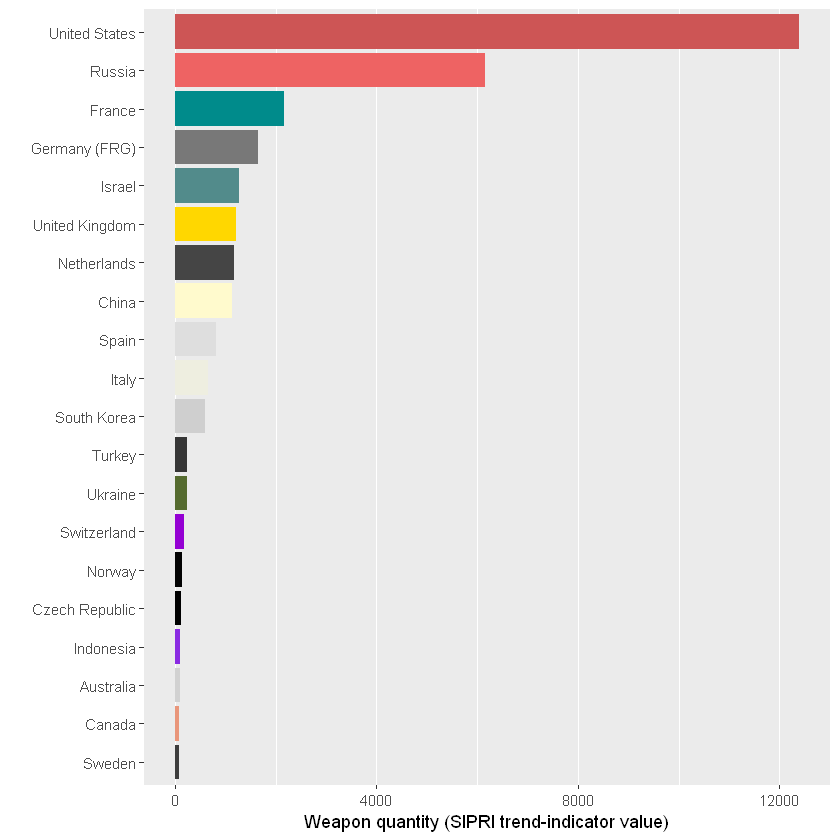

In [38]:
# 绘图
ggplot(data,aes(x=Country, y=Value, fill=Country) ) +
geom_bar(stat="identity") +
scale_fill_manual( values = mycolors ) +
coord_flip() +
theme(
  panel.grid.minor.y = element_blank(),
  panel.grid.major.y = element_blank(),
  legend.position="none"
) +
xlab("") +
ylab("Weapon quantity (SIPRI trend-indicator value)")

由上图可以看到颜色过于复杂，各组的颜色都是随机表示，会导致数据信息难以阅读。你的目的是让观众了解数据信息，一种好的办法就是用同样的颜色显示各组信息。如下图所示，这是使用单一颜色的相同图形。在我看来，它更好地传达了信息：

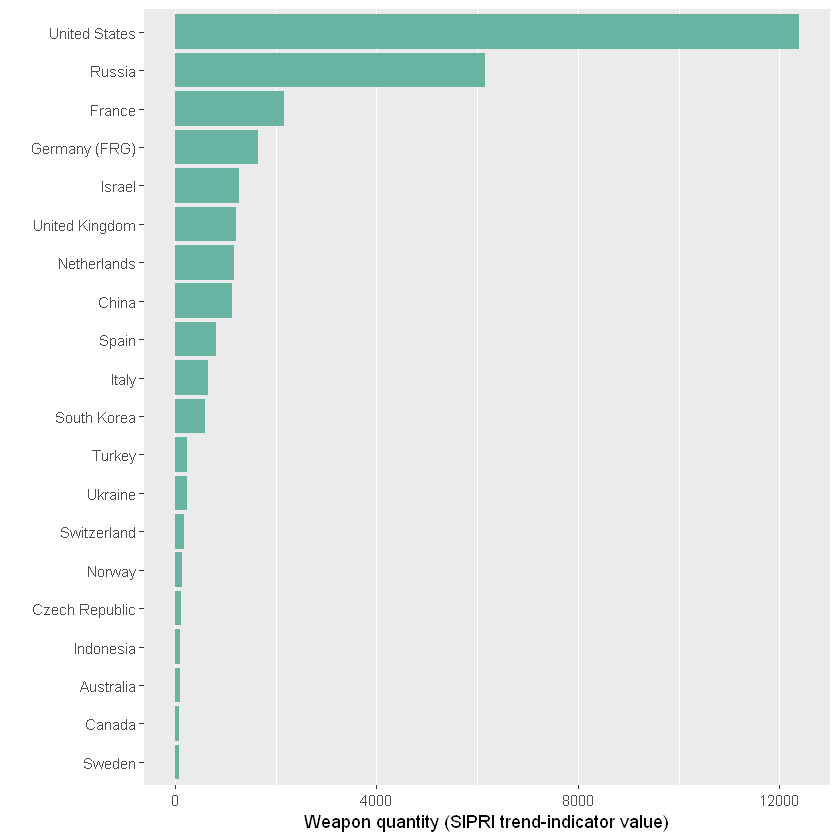

In [33]:
ggplot(data, aes(x=Country, y=Value) ) +
geom_bar(stat="identity", fill="#69b3a2") +
coord_flip() +
theme(
panel.grid.minor.y = element_blank(),
panel.grid.major.y = element_blank(),
legend.position="none"
) +
xlab("") +
ylab("Weapon quantity (SIPRI trend-indicator value)")

当然，可以使用突出颜色显示所选某些重要数据，这是一种常见的做法。

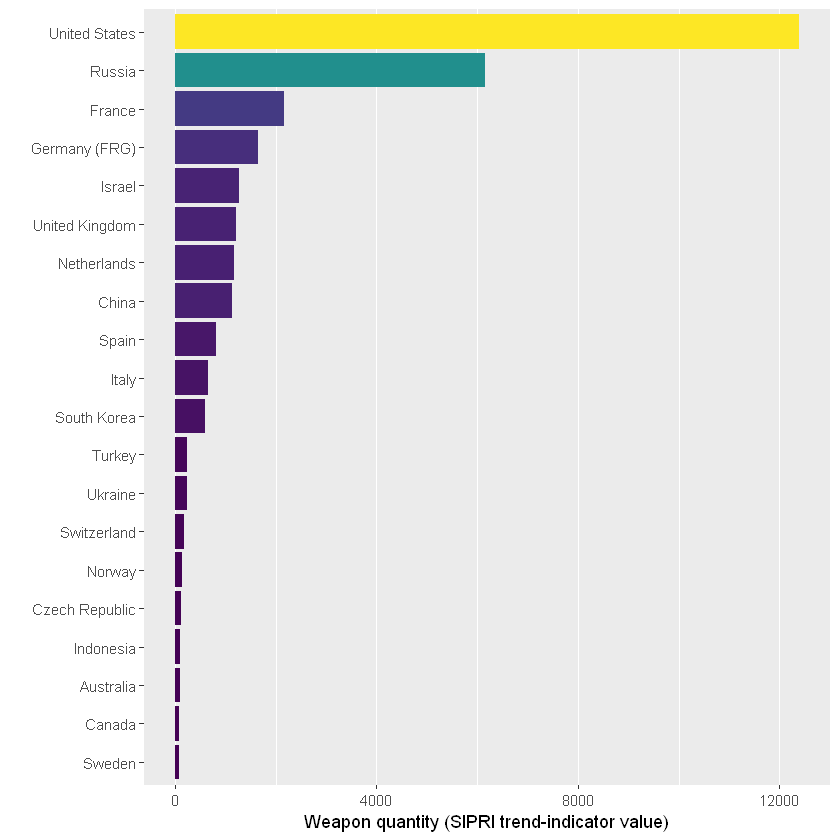

In [34]:
ggplot(data, aes(x=Country, y=Value, fill=Value) ) +
geom_bar(stat="identity") +
scale_fill_viridis() +
coord_flip() +
theme(
  panel.grid.minor.y = element_blank(),
  panel.grid.major.y = element_blank(),
  legend.position="none"
) +
xlab("") +
ylab("Weapon quantity (SIPRI trend-indicator value)")

## 参考

+ [DON’T USE COLOR IF THEY COMMUNICATE NOTHING](https://www.data-to-viz.com/caveat/color_com_nothing.html)
+ [What to consider when choosing colors for data visualization](https://blog.datawrapper.de/colors/)
+ [[数据分析与可视化] 科技论文配色心得](https://blog.csdn.net/LuohenYJ/article/details/118268302)